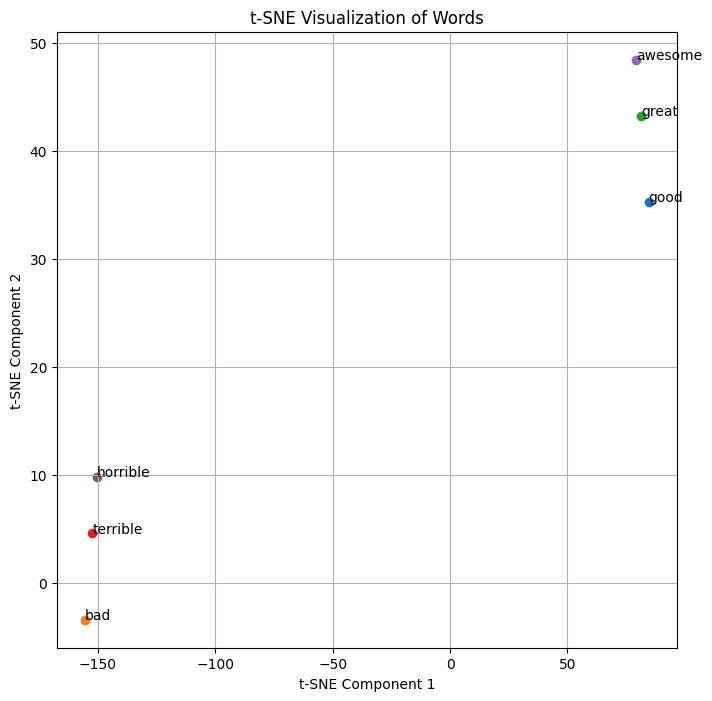

In [9]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Contoh data kata dan label
words = ['good', 'bad', 'great', 'terrible', 'awesome', 'horrible']
labels = [1, 0, 1, 0, 1, 0]  # Contoh label sentimen: 1 untuk positif, 0 untuk negatif

# Misalnya, kita memiliki representasi vektor kata yang telah dipelajari dari model
word_vectors = np.array([[0.1, 0.2],
                         [-0.1, -0.3],
                         [0.15, 0.25],
                         [-0.2, -0.4],
                         [0.18, 0.28],
                         [-0.25, -0.35]])

# Visualisasi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=1)  # Set perplexity to a value less than the number of samples
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plot kata-kata
plt.figure(figsize=(8, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1])
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Words')
plt.grid(True)
plt.show()
